## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
#%pylab inline

## 1. Objective of the analysis

The objective of the analysis is focused on prediction, with the aim to predict as accurately as possible, a countries life expectancy with the available data for each Country.

## 2. Description of the data
Studies have been undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that the effects of immunization and human development index were not taken into account in the past.
This study will adds immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Data is also separated by year and includes the years from 2000 to 2015.
The dataset is available here:
https://www.kaggle.com/kumarajarshi/life-expectancy-who


The full set of attributes, separated into categorical and numerical variables is as follows: <br>
<br>

**Categorical**
* Country <br>
* Status (Developed or Developing) <br>

**Numerical**
* Year <br>
* Adult mortality (Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) <br>
* Infant deaths (per 1000 population) <br>
* Alcohol (Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) <br>
* Percentage expenditure (Expenditure on health as a percentage of Gross Domestic Product per capita(%)) <br>
* Hepatitis B (Hepatitis B (HepB) immunization coverage among 1-year-olds (%)) <br>
* Measles (Measles - number of reported cases per 1000 population) <br>
* BMI (Average Body Mass Index of entire population) <br>
* Under-five deaths (Number of under-five deaths per 1000 population) <br>
* Polio (Polio (Pol3) immunization coverage among 1-year-olds (%)) <br>
* Total expenditure (General government expenditure on health as a percentage of total government expenditure (%)) <br>
* Diptheria (Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)) <br>
* HIV/AIDS (Deaths per 1 000 live births HIV/AIDS (0-4 years)) <br>
* GDP (Gross Domestic Product per capita (in USD)) <br>
* Population  <br>
* Thinness 1-19 (Prevalence of thinness among children and adolescents for Age 10 to 19 (% )) <br>
* Thinness 5-9 (Prevalence of thinness among children for Age 5 to 9(%)) <br>
* Income composition (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)) <br>
* Schooling (Schooling (Number of years of Schooling(years)) <br>
<br>

**Target variable (numerical)**
* Life expectancy (years) <br><br>

Summary data is as follows:

In [2]:
data = pd.read_csv('data\Life Expectancy Data.csv')
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 3. Data exploration, cleaning and feature Engineering

* drop the country column as there are a large number of value counts so encoding these would probably provide little value

In [3]:
data = data.drop(columns=['Country'])

* drop the 'percentage expenditure column' as there are many values > 100%, which cannot be correct<br>
* drop the 'Adult mortality' column as the range of values seems too large to be realistic. The range of values for each country across all years is also very large. We would expect Adult mortality to be fairly consistent between the year 2000 and 2015.  
* drop the 'Population' column as a lot of the data seems erroneous (Bottom quartile of populations all < 200000)
* Include the 'Measles' column even though the values don't appear to be cases per 1000. The  numbers could perhaps be total number of cases

In [4]:
data = data.drop(columns=['percentage expenditure', 'Adult Mortality', 'Population'])

* Separate into categorical and numerical features

In [5]:
# categorical data
cat = data.select_dtypes(include=['object']).columns.tolist()
#numerical data
num = data.select_dtypes(include=['int', 'float']).columns.tolist()

print('Categorical:\n', cat, '\n\nNumerical:\n', num)

Categorical:
 ['Status'] 

Numerical:
 ['Year', 'Life expectancy ', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


* Plot a boxplot of Life expectancy

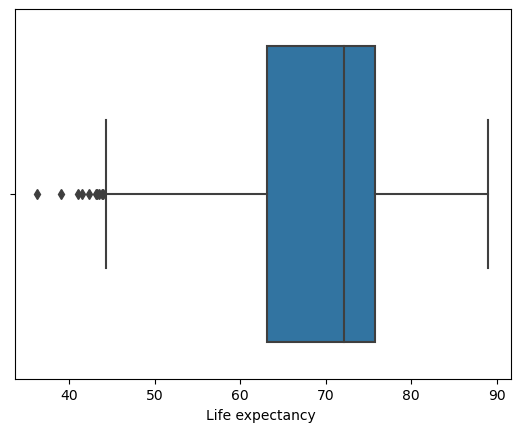

In [6]:
sns.boxplot(x=data['Life expectancy ']);
plt.show()

* Pairplot to look for correlations between features and check normality of distributions

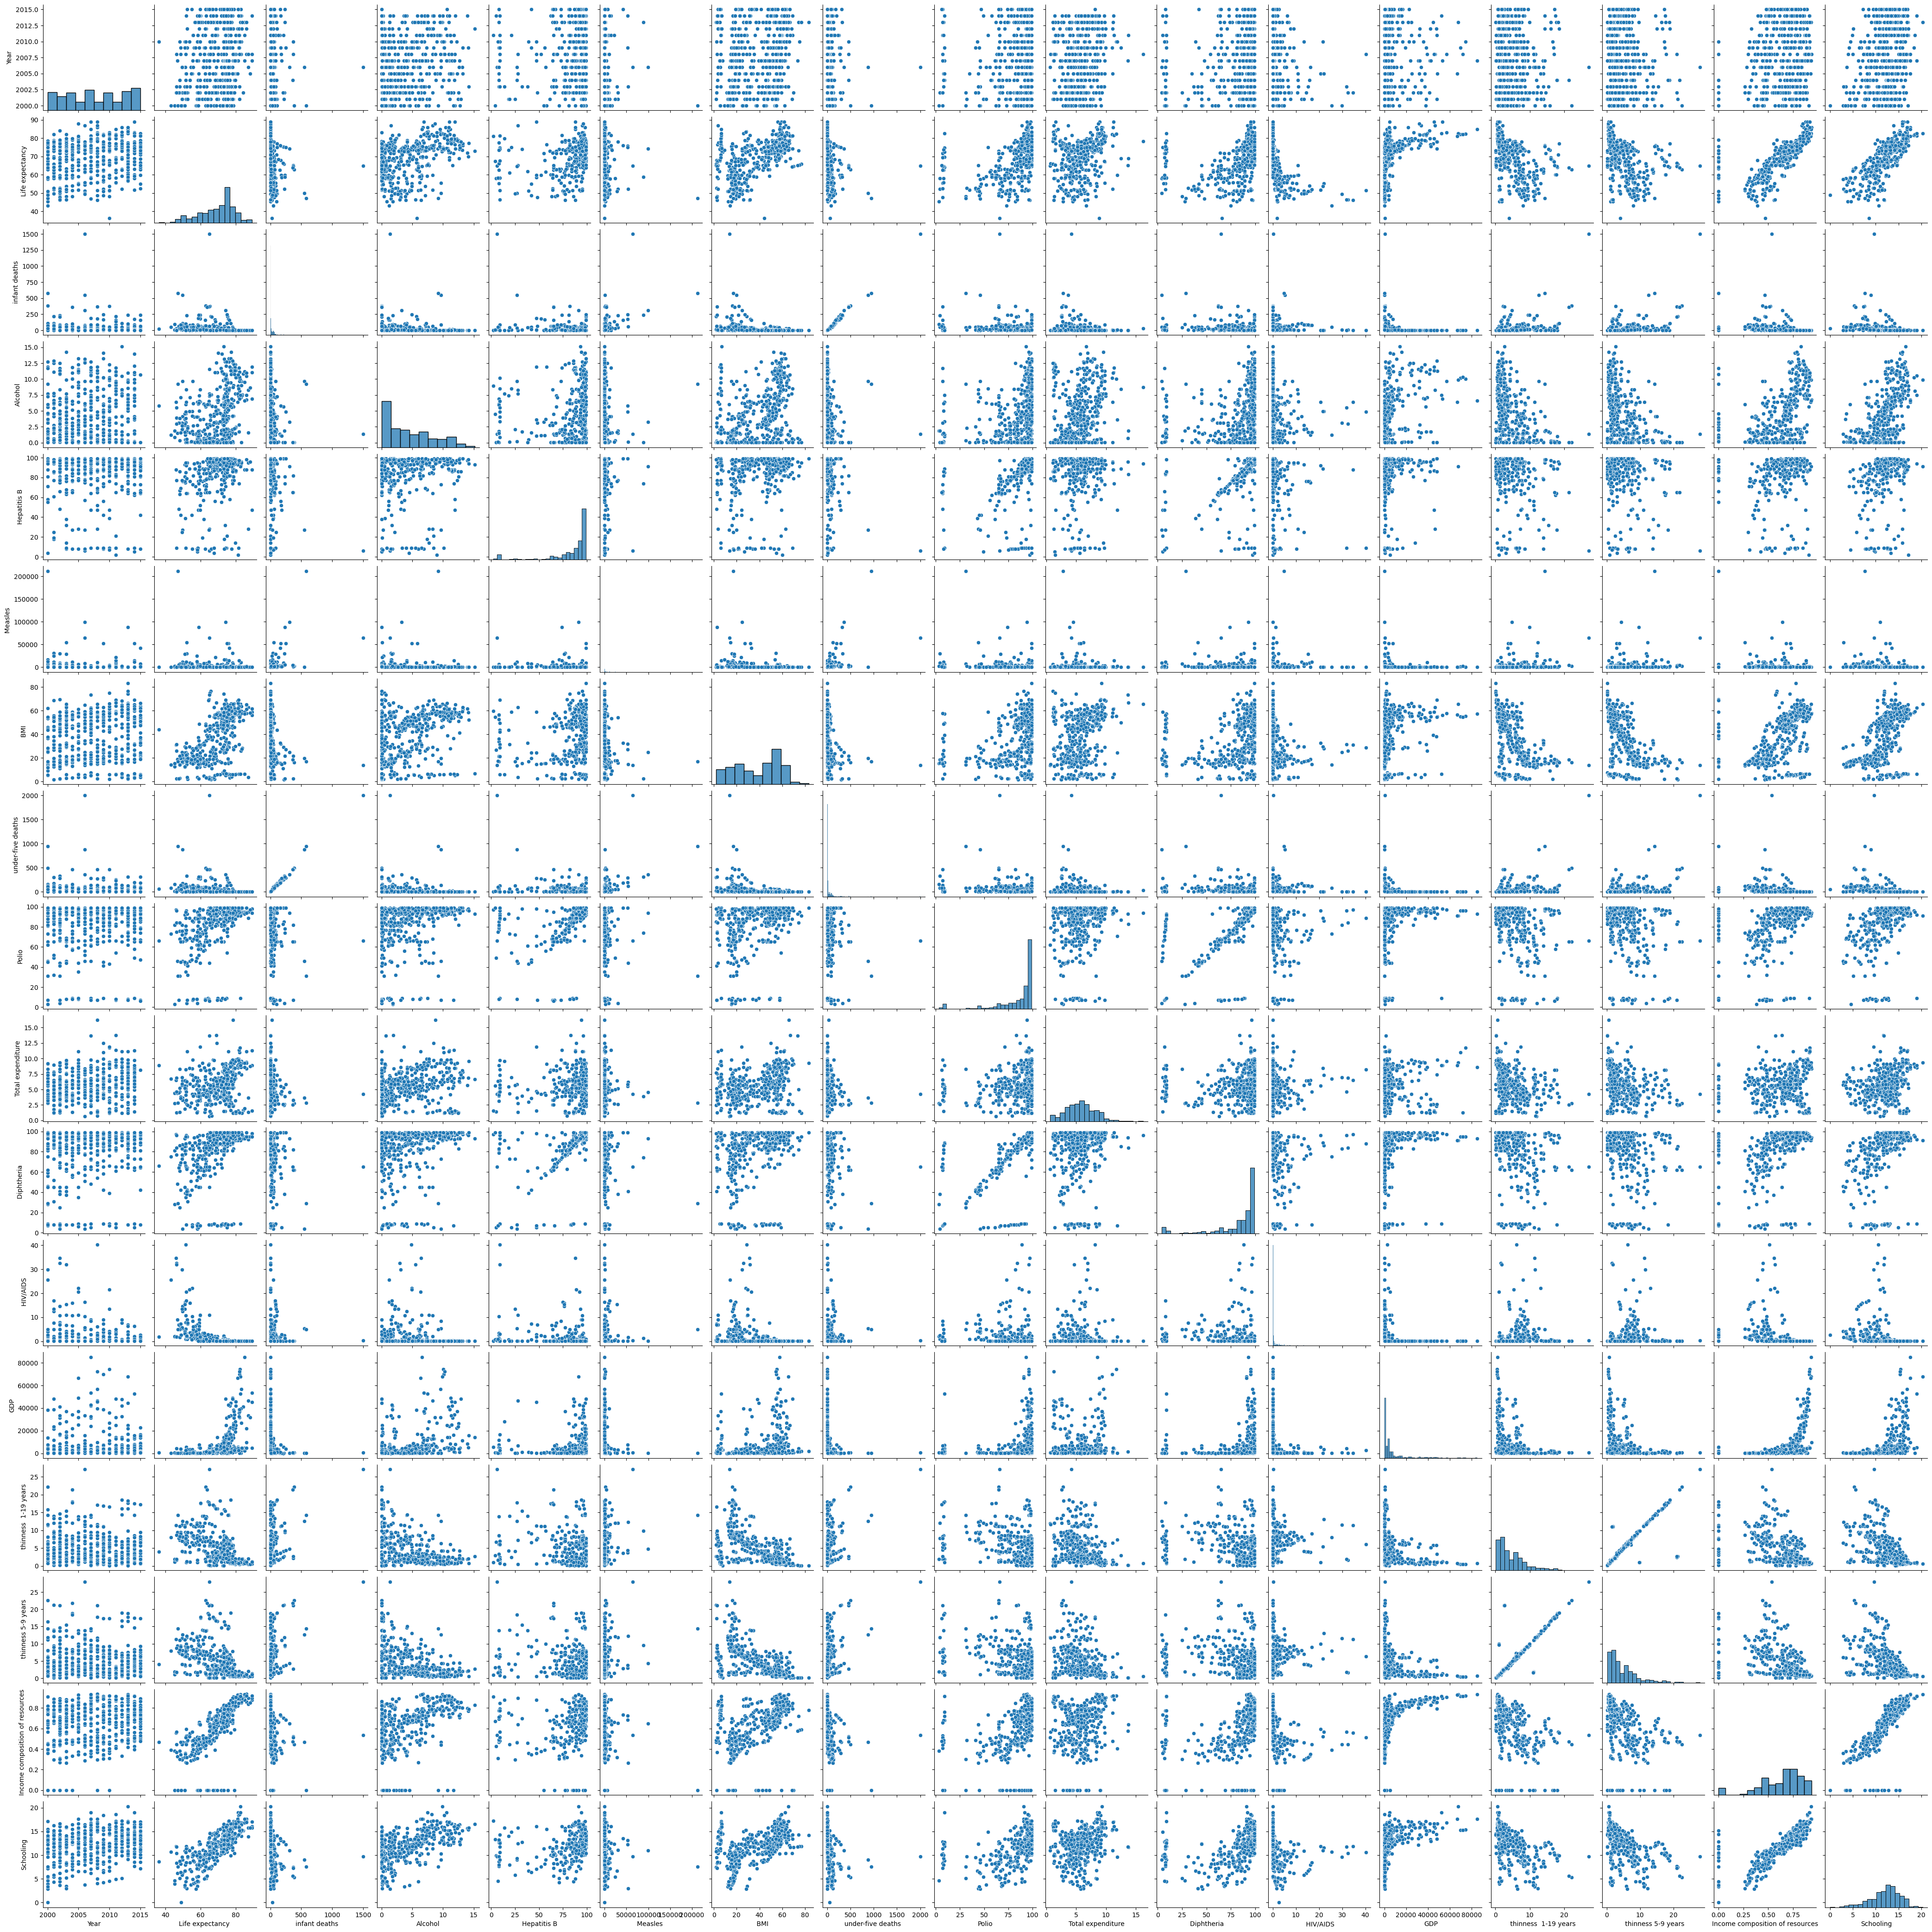

In [7]:
# plot a pairplot from a sample of the data to speed up computation
fig = sns.pairplot(data=data.sample(500))
plt.show()

* Impute rows where schooling=0 or Income composition of resources=0 with the column mean as it appears as this is 
missing data which would affect an otherwise well-correlated linear relationship between these variables and life expectancy

In [8]:
data.loc[:,'Schooling'][data.loc[:,'Schooling']==0] = data.loc[:,'Schooling'].mean()
data.loc[:,'Income composition of resources'][data.loc[:,'Income composition of resources']==0] = (
    data.loc[:,'Income composition of resources'].mean())

C:\Users\tomki\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tomki\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


* Check for the skew of the distribution of each numerical feature. Log transform positively skewed columns and square transform negatively skewed columns

In [9]:
# Select columns with abs(skew) >  0.75 
skew_cols_neg = data[num].columns[data[num].skew() < -0.75].tolist()   
skew_cols_pos = data[num].columns[data[num].skew() > 0.75].tolist()

# Apply log transform to positively skewed cols and square transform to neg skewed cols
data[skew_cols_pos] = data[skew_cols_pos].apply(np.log1p)
data[skew_cols_neg] = data[skew_cols_neg].apply(np.square)

* drop rows where life expectancy data is missing

In [10]:
data = data.dropna(subset=['Life expectancy ']) 

* Impute missing values with column mean

In [11]:
# To calculate mean use imputer class
# use for numerical columns only
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[num])
data[num] = imputer.transform(data[num])

* One-hot encode categorical columns

In [12]:
# set drop_first = True as we only need one column to define binary encoded data
data = pd.get_dummies(data, columns=cat, drop_first=True)
data.columns

Index(['Year', 'Life expectancy ', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

* Set the X and y variables

In [13]:
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

## 4. Regression analysis
### 4.1 Regular linear regression

In [14]:
lr = LinearRegression()

estimator = Pipeline([("regression", lr)])

params = {}

grid1 = GridSearchCV(estimator, params, cv=3)
grid1.fit(X, y)

print('Regular regression with polynomial features: R2 score = {}'
      .format(grid1.best_score_.round(6)))

Regular regression with polynomial features: R2 score = 0.84129


* Check which features have the highest importance:

In [15]:
# Dataframe of feature and model coefficient, sorted by coefficient
coefs = grid1.best_estimator_.named_steps['regression'].coef_
pd.DataFrame({'feature': X.columns.values, 'coefficient': coefs}).sort_values(by='coefficient')

,feature,coefficient
10,HIV/AIDS,-4.902291
6,under-five deaths,-4.251365
16,Status_Developing,-1.745454
13,thinness 5-9 years,-1.379744
2,Alcohol,-0.016095
3,Hepatitis B,-0.000194
7,Polio,0.000149
9,Diphtheria,0.000354
5,BMI,0.001945
4,Measles,0.056826


### 4.2 Regular linear regression with polynomial features

In [16]:
lr = LinearRegression()
pf = PolynomialFeatures(include_bias=False)

estimator = Pipeline([("polynomial features", pf),
                      ("regression", lr)])

params = {'polynomial features__degree': [2, 3]}

grid2 = GridSearchCV(estimator, params, cv=3)
grid2.fit(X, y)

print('Regular regression with polynomial features: R2 score = {}.\nBest hyperameters: {}'
      .format(grid2.best_score_.round(6), grid2.best_params_))

Regular regression with polynomial features: R2 score = 0.818484.
Best hyperameters: {'polynomial features__degree': 2}


### 4.3 Elastic net with hyperparameter optimisation

In [17]:
# Ignore convergence warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

en = ElasticNet(max_iter=100000)
pf = PolynomialFeatures(include_bias=False)
s = StandardScaler()

alphas = np.geomspace(0.001, 1.0, num=8)
l1ratios = np.linspace(0, 1, num=8)

estimator = Pipeline([("polynomial features", pf),
                      ("scaler", s),
                      ("elastic net", en)])

params = {'polynomial features__degree': [1, 2],
         'elastic net__alpha': alphas,
         'elastic net__l1_ratio': l1ratios}

grid3 = GridSearchCV(estimator, params, cv=3)
grid3.fit(X, y)

print('Elastic net with polynomial features: R2 score = {}.\nBest hyperameters: {}'
      .format(grid3.best_score_.round(6), grid3.best_params_))

Elastic net with polynomial features: R2 score = 0.845464.
Best hyperameters: {'elastic net__alpha': 0.0071968567300115215, 'elastic net__l1_ratio': 1.0, 'polynomial features__degree': 2}


# 5. Model summary

The Elastic net regression model had the best prediction capability out of the 3 models tested, with an R2 score equal to 0.845. The model used the following hyperparameters:
* alpha = 0.0072
* l1 ratio = 1.0 (Lasso regularisation)
* Polynomial features degree = 2

So this model fits the requirement of maximum prediction accuracy out of the models tested.

# 6. Key findings and insights

* The Elastic net model gave only a slightly better R2 score than the simple linear regression model, suggesting that the simple linear model models the data accurately and there is little to gain from adding polynomial features. 
* The best uses only a small alpha (regularisation) value so adding too much regularisation seems to add bias to model which just reduced the R2 score
* From the model coefficients of the linear model, 'income composition of resources' has by far the strongest positive effect on life expectancy and HIV/AIDS deaths per 1000 live births has the strongest negative effect.

# 7. Next steps
Some recommendations for next steps are:
* Some of the features such as 'percentage expenditure', 'Adult Mortality'and 'Population' seemed to contain erroneous data. These features were dropped as part of the analysis. Search for more accurate data for these dropped features and they may be able to improve prediction accuracy.
* There may be further inaccuracies in other features that were not dropped from the dataset. Rectifying these may improve the predictions also.
* A log transform may be beneficial for some features